# **1. Import Library**

Pada tahap ini, kita memuat sejumlah pustaka Python yang dibutuhkan untuk mendukung seluruh proses analisis data dan pembangunan model machine learning. Masing-masing pustaka memiliki peran dan kegunaannya sendiri.

In [ ]:
# Untuk pengolahan data
import pandas as pd
import numpy as np
from zipfile import ZipFile
from pathlib import Path

# Untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_palette('Set1')
sns.set()

# Untuk pemodelan
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Untuk menghilangkan warnings saat plotting seaborn
import warnings
warnings.filterwarnings('ignore')

# Untuk mengupload file
import os

# **2. Data Loading**

Agar dapat mengambil dataset dari Kaggle melalui Google Colab, perlu dilakukan pengaturan kredensial API Kaggle terlebih dahulu. Kaggle menyediakan API yang memungkinkan pengguna mengakses dataset secara langsung tanpa harus mengunduhnya secara manual.

Langkah ini melibatkan pengunggahan file kaggle.json, yang berisi informasi kredensial API dan dapat diperoleh dari halaman akun pengguna di Kaggle.

In [ ]:
# Import module yang disediakan google colab untuk kebutuhan upload file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saniskalita","key":"7866ef8cb9a7e995a8abaf1a0eede5c8"}'}

In [ ]:
# Hapus file/folder lama yang bisa bentrok
!rm -rf "indonesia-tourism-destination.zip"
!rm -rf "package_tourism.csv"
!rm -rf "tourism_with_id.csv"
!rm -rf "tourism_rating.csv"
!rm -rf "user.csv"

# Setup kredensial Kaggle (pastikan kaggle.json ada di root direktori)
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Unduh dataset Indonesia Tourism Destination dari Kaggle
!kaggle datasets download -d aprabowo/indonesia-tourism-destination

# Ekstrak file ZIP
!unzip indonesia-tourism-destination.zip

Dataset URL: https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination
License(s): copyright-authors
  0% 0.00/158k [00:00<?, ?B/s]
100% 158k/158k [00:00<00:00, 393MB/s]
Archive:  indonesia-tourism-destination.zip
  inflating: package_tourism.csv     
  inflating: tourism_rating.csv      
  inflating: tourism_with_id.csv     
  inflating: user.csv                


Dataset "Indonesia Tourism Destination" diunduh dari Kaggle menggunakan perintah `!kaggle datasets download -d aprabowo/indonesia-tourism-destination` dengan kredensial yang sudah disiapkan sebelumnya. Setelah file ZIP bernama `indonesia-tourism-destination.zip` berhasil diunduh, file tersebut diekstrak menggunakan perintah `!unzip indonesia-tourism-destination.zip` untuk mengakses file CSV yang ada di dalamnya, yaitu `package_tourism.csv`, `tourism_rating.csv`, `tourism_with_id.csv`, dan `user.csv`.


In [ ]:
# Membaca dataset
place = pd.read_csv('tourism_with_id.csv')
rating = pd.read_csv('tourism_rating.csv')
users = pd.read_csv('user.csv')

In [ ]:
print('Jumlah Wisata :', len(place.Place_Id.unique()))
print('Jumlah Data User :', len(users.User_Id.unique()))
print('Jumlah Data Rating Wisata :', len(rating.Place_Id.unique()))

Jumlah Wisata : 437
Jumlah Data User : 300
Jumlah Data Rating Wisata : 437


Pada dataset terdapat empat file berformat .csv. Namun, dalam proyek ini hanya digunakan tiga file utama, yaitu data wisata (tourism_with_id.csv), data pengguna (user.csv), dan data rating wisata (tourism_rating.csv). Data wisata berisi total 437 entri yang mencakup objek wisata dari lima kota terbesar di Indonesia, yaitu Bandung, Jakarta, Yogyakarta, Semarang, dan Surabaya

# **3. Data Understanding**

## **Place**

Pertama kita lihat terlebih dahulu struktur tourism_with_id.csv dengan fungsi head()

In [ ]:
place.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


Karena fokus dari proyek sistem rekomendasi wisata ini adalah memberikan rekomendasi tempat wisata di Kota Yogyakarta saja, maka langkah pertama yang dilakukan adalah menyaring data agar hanya menyertakan entri yang berasal dari kota tersebut. Hal ini penting untuk memastikan bahwa rekomendasi yang dihasilkan tetap relevan secara geografis dan sesuai konteks penggunaan.

In [ ]:
# Filter data untuk hanya menyertakan lokasi wisata dari Yogyakarta
place = place.loc[place['City'].str.lower() == 'yogyakarta'].reset_index(drop=True)
place.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,85,Taman Pintar Yogyakarta,Taman Pintar Yogyakarta (bahasa Jawa: Hanacara...,Taman Hiburan,Yogyakarta,6000,4.5,120.0,"{'lat': -7.800671500000001, 'lng': 110.3676551}",-7.800671,110.367655,NaN,85
1,86,Keraton Yogyakarta,Keraton Ngayogyakarta Hadiningrat atau Keraton...,Budaya,Yogyakarta,15000,4.6,NaN,"{'lat': -7.8052845, 'lng': 110.3642031}",-7.805284,110.364203,NaN,86
2,87,Sindu Kusuma Edupark (SKE),Sindu Kusuma Edupark (SKE) merupakan sebuah de...,Taman Hiburan,Yogyakarta,20000,4.2,120.0,"{'lat': -7.767297300000001, 'lng': 110.3542486}",-7.767297,110.354249,NaN,87
3,88,Museum Benteng Vredeburg Yogyakarta,Museum Benteng Vredeburg (bahasa Jawa: ꦩꦸꦱꦶꦪꦸꦩ...,Budaya,Yogyakarta,3000,4.6,120.0,"{'lat': -7.800201599999999, 'lng': 110.3663044}",-7.800202,110.366304,NaN,88
4,89,De Mata Museum Jogja,Museum De Mata merupakan salah satu museum yan...,Budaya,Yogyakarta,50000,4.4,NaN,"{'lat': -7.816315599999999, 'lng': 110.3871442}",-7.816316,110.387144,NaN,89


Dengan perintah di atas:

- Kolom 'City' diubah menjadi huruf kecil menggunakan .str.lower() untuk memastikan pencocokan yang konsisten dan menghindari error karena perbedaan kapitalisasi.
- Data disaring agar hanya mencakup entri di mana 'City' bernilai 'yogyakarta'.
- Index dataframe di-reset untuk menghindari inkonsistensi saat data digunakan dalam model atau visualisasi selanjutnya.

Setelah proses filter ini, dataframe place akan berisi daftar tempat wisata yang berlokasi di Kota Yogyakarta saja, dan akan digunakan sebagai dasar untuk membangun sistem rekomendasi yang lebih spesifik dan tepat sasaran.

Langkah selanjutnya adalah memeriksa struktur dan informasi umum dari dataset. Pertama, ditampilkan jumlah baris dan kolom menggunakan atribut .shape, kemudian digunakan fungsi df.info() untuk melihat tipe data pada setiap kolom serta jumlah nilai non-null di masing-masing kolom.

In [ ]:
# Melihat jumlah baris dan kolom
print(f"Jumlah baris: {place.shape[0]}")
print(f"Jumlah kolom: {place.shape[1]}")

# Melihat tipe data pada setiap kolom
place.info()

Jumlah baris: 126
Jumlah kolom: 13
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      126 non-null    int64  
 1   Place_Name    126 non-null    object 
 2   Description   126 non-null    object 
 3   Category      126 non-null    object 
 4   City          126 non-null    object 
 5   Price         126 non-null    int64  
 6   Rating        126 non-null    float64
 7   Time_Minutes  60 non-null     float64
 8   Coordinate    126 non-null    object 
 9   Lat           126 non-null    float64
 10  Long          126 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   126 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 12.9+ KB


Hasil dari df.info() menunjukkan bahwa dataset ini terdiri dari 126 baris dan 13 kolom: Berikut adalah penjelasan masing-masing kolom:
* **Place\_Id**: Merupakan angka unik yang digunakan untuk mengidentifikasi setiap tempat wisata.
* **Place\_Name**: Menyatakan nama dari tempat wisata yang tersedia di Yogyakarta.
* **Description**: Menyediakan informasi ringkas mengenai daya tarik atau keunikan tempat wisata.
* **Category**: Menjelaskan jenis atau kategori wisata seperti bahari, budaya, sejarah, dan lainnya.
* **City**: Menunjukkan nama kota tempat wisata berada, difokuskan hanya pada “Yogyakarta”.
* **Price**: Menggambarkan harga tiket masuk ke lokasi wisata dalam satuan rupiah.
* **Rating**: Menampilkan nilai ulasan rata-rata dari pengunjung terhadap tempat wisata.
* **Time\_Minutes**: Mengestimasi lama waktu kunjungan wisatawan dalam satuan menit.
* **Coordinate**: Menyimpan lokasi geografis tempat wisata dalam format lintang dan bujur.
* **Lat**: Menyatakan nilai lintang (latitude) dari tempat wisata.
* **Long**: Menyatakan nilai bujur (longitude) dari tempat wisata.
* **Unnamed: 11**: Kolom kosong tanpa data yang tidak digunakan dalam analisis.
* **Unnamed: 12**: Kolom tambahan yang kemungkinan berasal dari kesalahan ekspor dan tidak memiliki arti penting.

Untuk tipe data semua kolom telah sesuai dengan kebutuhan.

Selanjutnya, kita akan memeriksa apakah terdapat data yang missing value atau tidak pada dataset.

In [ ]:
# Memeriksa missing value
place.isnull().sum()

,0
Place_Id,0
Place_Name,0
Description,0
Category,0
City,0
Price,0
Rating,0
Time_Minutes,66
Coordinate,0
Lat,0


Adanyanya missing value pada kolom Time_Minutes dan Unnamed: 11. Namun, kolom-kolom ini tidak relevan dalam konteks sistem rekomendasi berbasis content-based filtering dan collaborative filtering, sehingga sebaiknya dihapus agar tidak menambah kompleksitas data.

Setelah itu, kita periksa apakah ada data yang duplikat.

In [ ]:
# Memeriksa duplikasi data
jumlah_duplikat = place.duplicated().sum()
print(f"Jumlah baris duplikat: {jumlah_duplikat}")

Jumlah baris duplikat: 0


Hasil pemeriksaan menunjukkan bahwa tidak ada baris duplikat dalam dataset, dengan jumlah baris duplikat adalah 0.

## **Rating**

Pertama kita lihat terlebih dahulu struktur tourism_rating.csv dengan fungsi head()

In [ ]:
rating.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


menyaring data rating agar hanya mencakup rating yang diberikan untuk tempat wisata yang berada di Yogyakarta

In [ ]:
# Filter rating berdasarkan tempat wisata yang berlokasi di Yogyakarta
yogyakarta_ids = place.loc[place['City'] == 'Yogyakarta', 'Place_Id']
rating = rating[rating['Place_Id'].isin(yogyakarta_ids)].reset_index(drop=True)
rating.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,101,4
2,1,154,2
3,1,103,3
4,1,208,5


Data `rating` ini menunjukkan bahwa:

* Setiap pengguna (`User_Id`) dapat memberikan rating ke beberapa tempat wisata (`Place_Id`) yang berada di Yogyakarta.
* Rating yang diberikan berupa nilai numerik (misalnya 1–5), yang merefleksikan tingkat kepuasan atau penilaian pengguna terhadap tempat wisata tersebut.
* Dengan data ini, kita bisa memahami pola preferensi dan kepuasan wisatawan terhadap berbagai destinasi di Yogyakarta.
* Informasi ini sangat berguna untuk analisis kualitas tempat wisata dan pengembangan sistem rekomendasi yang lebih akurat untuk wisatawan.

Langkah selanjutnya adalah memeriksa struktur dan informasi umum dari dataset. Pertama, ditampilkan jumlah baris dan kolom menggunakan atribut .shape, kemudian digunakan fungsi df.info() untuk melihat tipe data pada setiap kolom serta jumlah nilai non-null di masing-masing kolom.

In [ ]:
# Melihat jumlah baris dan kolom
print(f"Jumlah baris: {rating.shape[0]}")
print(f"Jumlah kolom: {rating.shape[1]}")

# Melihat tipe data pada setiap kolom
rating.info()

Jumlah baris: 2871
Jumlah kolom: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2871 entries, 0 to 2870
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        2871 non-null   int64
 1   Place_Id       2871 non-null   int64
 2   Place_Ratings  2871 non-null   int64
dtypes: int64(3)
memory usage: 67.4 KB


Hasil dari df.info() menunjukkan bahwa dataset ini terdiri dari 2871 baris dan 3 kolom: Berikut adalah penjelasan masing-masing kolom:

* **User_Id**: ID unik pengguna yang memberikan rating
* **Place_Id**: ID unik tempat wisata yang berlokasi di Yogyakarta
* **Place_Ratings**: Nilai rating yang diberikan pengguna terhadap tempat tersebut (biasanya dalam skala 1–5).

Tipe data User_Id,Place_Id dan Place_Ratings sudah int64 sesuai kebutuhan.

Selanjutnya, kita akan memeriksa apakah terdapat data yang missing value atau tidak pada dataset.

In [ ]:
# Memeriksa missing value
rating.isnull().sum()

,0
User_Id,0
Place_Id,0
Place_Ratings,0


Tidak ada missing value untuk setiap kolom sehingga tidak diperlukan penanganan missing value.

Setelah itu, kita periksa apakah ada data yang duplikat.

In [ ]:
# Memeriksa duplikasi data
jumlah_duplikat = rating.duplicated().sum()
print(f"Jumlah baris duplikat: {jumlah_duplikat}")

Jumlah baris duplikat: 23


Terdapat 23 baris duplikat dalam data rating, yang bisa menyebabkan bias pada analisis atau model.

## **User**

Pertama kita lihat terlebih dahulu struktur users.csv dengan fungsi head()

In [ ]:
users.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


Kemudian menyaring data pengguna (user) yang pernah memberikan rating pada tempat wisata yang berada di Yogyakarta.

In [ ]:
# Ambil ID tempat wisata yang berada di Yogyakarta
yogya_places = place[place['City'].str.lower() == 'yogyakarta']['Place_Id']

# Ambil ID user yang pernah memberi rating pada tempat-tempat tersebut
yogya_user_ids = rating[rating['Place_Id'].isin(yogya_places)]['User_Id'].drop_duplicates()

# Filter data user hanya yang berasal dari ID tersebut
user_filtered = users[users['User_Id'].isin(yogya_user_ids)].reset_index(drop=True)
user_filtered.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


Data `user_filtered` menunjukkan daftar pengguna yang **pernah memberikan rating pada tempat wisata di Yogyakarta**. Dari hasil tersebut dapat disimpulkan bahwa:

* **Pengguna berasal dari berbagai daerah** di Indonesia, seperti Semarang, Bekasi, Cirebon, dan Lampung, bukan hanya dari Yogyakarta saja.
* **Kelompok usia pengguna** yang memberikan rating berkisar antara **20–23 tahun** berdasarkan data yang tertampil, menunjukkan bahwa **pengguna muda lebih aktif** dalam memberikan penilaian terhadap tempat wisata.
* Data ini relevan untuk **analisis preferensi wisatawan Yogyakarta**, serta dapat digunakan sebagai dasar dalam **pengembangan sistem rekomendasi** atau strategi pemasaran yang lebih tertarget.

Langkah selanjutnya adalah memeriksa struktur dan informasi umum dari dataset. Pertama, ditampilkan jumlah baris dan kolom menggunakan atribut .shape, kemudian digunakan fungsi df.info() untuk melihat tipe data pada setiap kolom serta jumlah nilai non-null di masing-masing kolom.

In [ ]:
# Melihat jumlah baris dan kolom
print(f"Jumlah baris: {users.shape[0]}")
print(f"Jumlah kolom: {users.shape[1]}")

# Melihat tipe data pada setiap kolom
users.info()

Jumlah baris: 300
Jumlah kolom: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


Hasil dari df.info() menunjukkan bahwa dataset ini terdiri dari 300 baris dan 3 kolom. Berikut adalah penjelasan masing-masing kolom:
- **User_Id**: ID unik untuk setiap pengguna.
- **Location**: Lokasi asal pengguna, terdiri dari kota dan provinsi.
- **Age**: Usia Pengguna.

Dataset terdiri dari kolom User_Id dan Age dengan tipe int64, serta Location dengan tipe object yang sudah sesuai dengan jenis data masing-masing.

Selanjutnya kita memeriksa apakah ada missing value.

In [ ]:
# Memeriksa missing value
users.isnull().sum()

,0
User_Id,0
Location,0
Age,0


Tidak ada missing value untuk setiap kolom sehingga tidak diperlukan penanganan missing value.

Setelah itu, kita periksa apakah ada data yang duplikat.

In [ ]:
# Memeriksa duplikasi data
jumlah_duplikat = users.duplicated().sum()
print(f"Jumlah baris duplikat: {jumlah_duplikat}")

Jumlah baris duplikat: 0


Hasil pemeriksaan menunjukkan bahwa tidak ada baris duplikat dalam dataset, dengan jumlah baris duplikat adalah 0.

# **4. Exploratory Data Analysis (EDA)**

Selanjutnya, kita akan melakukan proses analisis data dengan teknik Univariate Analysis.

## **Univariate Analysis**

**place**

Kita akan melakukan analisis distribusi kategori tempat wisata khususnya di Yogyakarta

                    Total Kategori Wisata Yogyakarta  Persentase (%)
Category                                                            
Taman Hiburan                                     36            28.6
Bahari                                            34            27.0
Budaya                                            30            23.8
Cagar Alam                                        23            18.3
Pusat Perbelanjaan                                 3             2.4


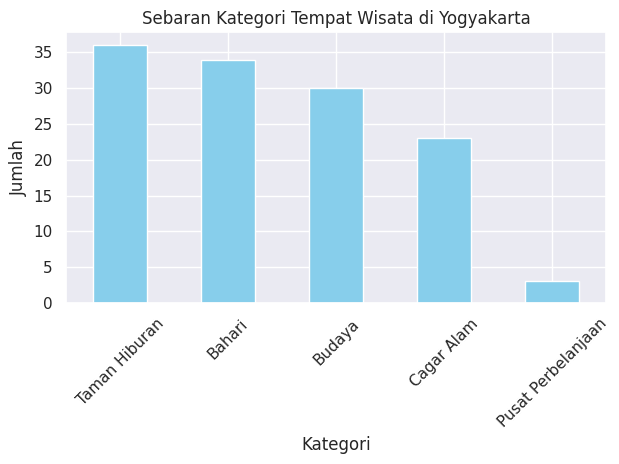

In [ ]:
# Filter data wisata khusus untuk Kota Yogyakarta
wisata_yogya = place[place['City'].str.lower() == 'yogyakarta']

# Hitung jumlah dan persentase tiap kategori wisata
kategori_counts = wisata_yogya['Category'].value_counts()
kategori_percent = wisata_yogya['Category'].value_counts(normalize=True) * 100

# Gabungkan dalam bentuk DataFrame
summary_kategori = pd.DataFrame({
    'Total Kategori Wisata Yogyakarta': kategori_counts,
    'Persentase (%)': kategori_percent.round(1)
})

# Tampilkan tabel
print(summary_kategori)

# Visualisasi
summary_kategori['Total Kategori Wisata Yogyakarta'].plot(
    kind='bar',
    color='skyblue',
    title='Sebaran Kategori Tempat Wisata di Yogyakarta'
)
plt.ylabel('Jumlah')
plt.xlabel('Kategori')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Berdasarkan diagram batang dan tabel distribusi, terlihat bahwa:

* **Taman Hiburan** merupakan kategori tempat wisata terbanyak di Yogyakarta dengan **jumlah 36 lokasi**. Ini menunjukkan bahwa jenis wisata ini sangat populer dan berkembang di daerah tersebut.
* **Bahari** menyusul dengan **34 lokasi**, menandakan bahwa wisata air (seperti pantai, danau, atau laut) juga menjadi daya tarik utama.
* **Budaya** berada di posisi ketiga dengan **30 lokasi**, mencerminkan kekayaan budaya dan sejarah Yogyakarta.
* **Cagar Alam** memiliki **23 lokasi**, menunjukkan adanya perhatian terhadap pelestarian alam sebagai destinasi wisata.
* **Pusat Perbelanjaan** paling sedikit, hanya **3 lokasi**, menandakan bahwa wisata belanja bukan fokus utama pariwisata di Yogyakarta.

Secara visual, diagram ini menunjukkan distribusi yang cukup merata pada empat kategori utama, dengan penurunan drastis hanya pada kategori pusat perbelanjaan.


**rating**

Kemudian melakukan analisis distribusi nilai rating untuk melihat frekuensi (jumlah) masing-masing nilai rating yang diberikan

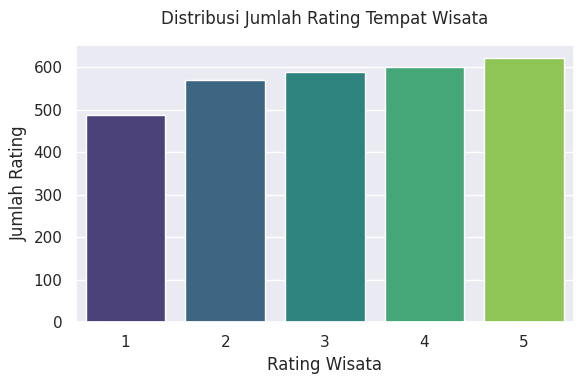

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi rating dalam bentuk countplot
plt.figure(figsize=(6, 4))
sns.countplot(x='Place_Ratings', data=rating, palette='viridis')
plt.title('Distribusi Jumlah Rating Tempat Wisata', pad=15)
plt.xlabel('Rating Wisata')
plt.ylabel('Jumlah Rating')
plt.tight_layout()
plt.show()

Berdasarkan visualisasi diagram batang menunjukkan bahwajumlah tempat wisata di Yogyakarta berdasarkan rating (skala 1–5).
Sumbu X menunjukkan nilai rating wisata (dari 1 hingga 5), sedangkan sumbu Y menunjukkan jumlah tempat wisata yang memiliki rating tersebut. Di mana:
- Tempat wisata dengan rating 5 memiliki jumlah terbanyak, menunjukkan banyak destinasi yang mendapat penilaian sangat baik dari pengunjung.
- Jumlah tempat wisata meningkat secara bertahap dari rating 1 ke rating 5.
- Rating 1 memiliki jumlah paling sedikit, mengindikasikan bahwa sedikit tempat wisata dinilai buruk.

**users**

Kemudian kita akan melakukan analisis distribusi berdasarkan umur pengguna yang datang berwisata

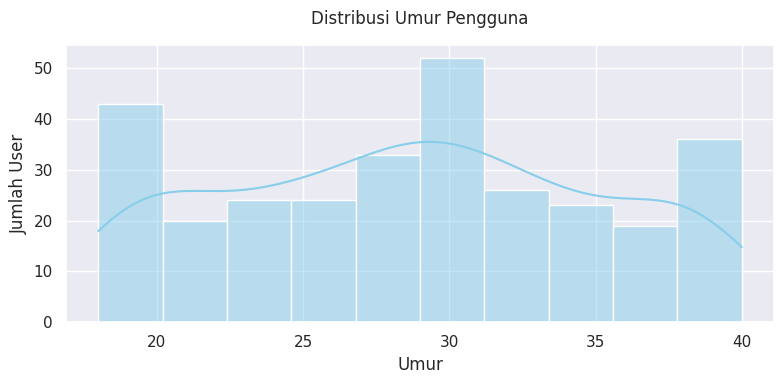

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(users['Age'], bins=10, kde=True, color='skyblue')
plt.title('Distribusi Umur Pengguna', fontsize=12, pad=15)
plt.xlabel('Umur')
plt.ylabel('Jumlah User')
plt.tight_layout()
plt.show()

Berdasarkan visualisasi histogram menunjukkan bahwa mayoritas pengguna berasal dari kelompok usia muda hingga dewasa awal, dengan puncak pada usia sekitar 30 tahun. Hal ini menunjukkan bahwa platform atau layanan terkait paling banyak menarik minat pengguna di usia produktif.

Selanjutkan kita akan menganalisis tempat wisata di Yogyakarta berdasarkan jumlah terbanyak untuk mengidentifikasi 10 tempat wisata yang paling banyak mendapatkan rating dari pengguna, bukan berdasarkan skor rating tertinggi, melainkan berdasarkan kuantitas rating yang diberikan (berapa kali suatu tempat dirating oleh user).

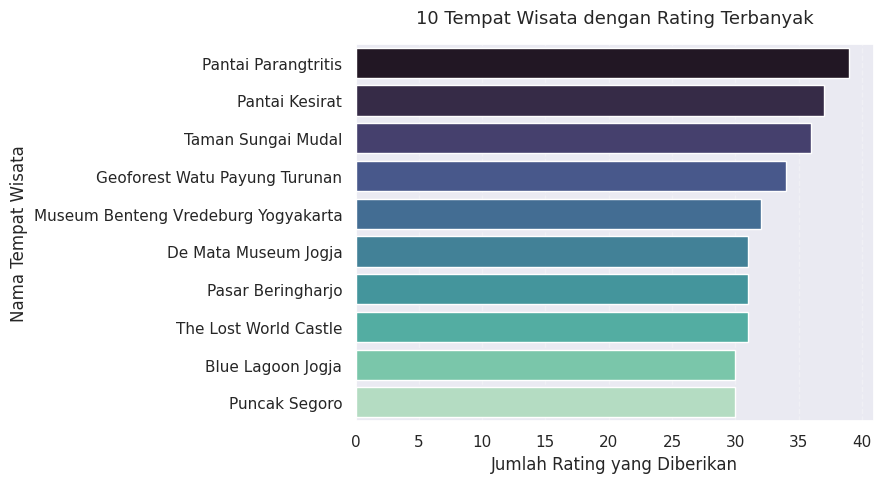

In [ ]:
# Hitung total rating per tempat wisata
rating_terbanyak = rating['Place_Id'].value_counts().head(10).reset_index()
rating_terbanyak.columns = ['Place_Id', 'Total_Rating']

# Gabungkan dengan nama tempat wisata
data_wisata_top = pd.merge(rating_terbanyak, place[['Place_Id', 'Place_Name']], on='Place_Id', how='left')

# Visualisasi data
plt.figure(figsize=(9, 5))
sns.barplot(data=data_wisata_top, x='Total_Rating', y='Place_Name', palette='mako')
plt.title('10 Tempat Wisata dengan Rating Terbanyak', fontsize=13, pad=15)
plt.xlabel('Jumlah Rating yang Diberikan')
plt.ylabel('Nama Tempat Wisata')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

Berdasarkan visualisasi diagram batang horizontal yang menunjukkan 10 tempat wisata di Yogyakarta dengan jumlah rating terbanyak yang diberikan oleh pengguna. Sumbu X menunjukkan jumlah rating, dan sumbu Y menampilkan nama tempat. Destinasi wisata di Yogyakarta yang paling banyak mendapat perhatian pengguna adalah tempat-tempat dengan keunikan alam dan budaya yang khas, serta daya tarik sejarah. Hal ini menunjukkan preferensi pengunjung terhadap pengalaman wisata yang beragam dan autentik.




Selanjutkan kita akan melakukan analisis pengguna teraktif atau teratas berdasarkan jumlah rating yang diberikan untuk mengidentifikasi 10 pengguna paling aktif dalam memberikan rating terhadap tempat wisata di dataset yang kamu miliki.

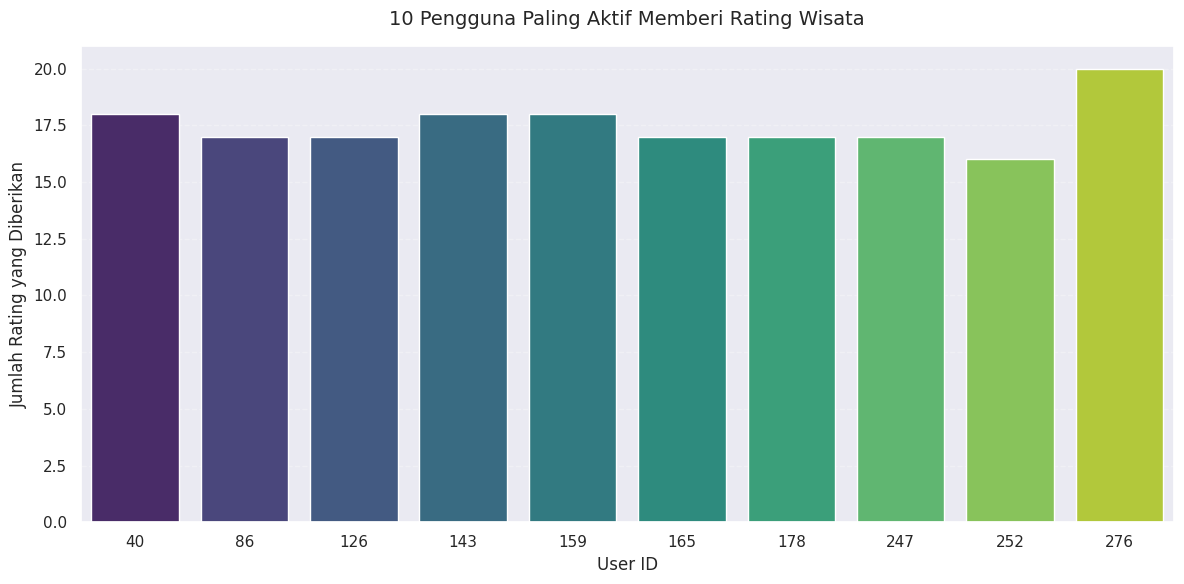

In [ ]:
# Hitung 10 pengguna teraktif berdasarkan jumlah rating wisata yang diberikan
pengguna_aktif = rating['User_Id'].value_counts().head(10)

# Buat ukuran plot
plt.figure(figsize=(12, 6))

# Visualisasi data pengguna teratas (plot batang vertikal)
sns.barplot(x=pengguna_aktif.index, y=pengguna_aktif.values, palette='viridis')

# Tambahkan informasi pada grafik
plt.title('10 Pengguna Paling Aktif Memberi Rating Wisata', fontsize=14, pad=15)
plt.ylabel('Jumlah Rating yang Diberikan')
plt.xlabel('User ID')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

Berdasarkan visualisasi gambar menunjukkan diagram batang vertikal yang merepresentasikan 10 pengguna (berdasarkan User ID) yang paling aktif dalam memberikan rating terhadap tempat wisata di Yogyakarta. Data ini mengindikasikan bahwa terdapat komunitas pengguna yang aktif dalam menilai tempat wisata di Yogyakarta. Informasi dari pengguna-pengguna aktif ini sangat berharga sebagai acuan kualitas destinasi dan dapat dimanfaatkan untuk sistem rekomendasi atau evaluasi pariwisata.

# **5. Data Preparation**

## **Cleaning Dataset**

### **place**

Pada proses data understanding yang telah dilakukan pada dataset tourism_with_id.csv sebelumnya ditemukan adanya missing value pada kolom Time_Minutes dan Unnamed: 11

In [ ]:
# Memeriksa missing value
place.isnull().sum()

,0
Place_Id,0
Place_Name,0
Description,0
Category,0
City,0
Price,0
Rating,0
Time_Minutes,66
Coordinate,0
Lat,0


Karena pada analisis rekomendasi ini kolom Time_Minutes, Unnamed: 11, dan Unnamed: 12 tidak diperlukan, maka kolom-kolom tersebut akan dihapus sehingga penanganan missing value pada kolom-kolom tersebut tidak perlu dilakukan.

In [ ]:
# Membuang kolom yang tidak dipakai
place = place.drop(['Unnamed: 11','Unnamed: 12', 'Time_Minutes'],axis=1)
place.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Coordinate,Lat,Long
0,85,Taman Pintar Yogyakarta,Taman Pintar Yogyakarta (bahasa Jawa: Hanacara...,Taman Hiburan,Yogyakarta,6000,4.5,"{'lat': -7.800671500000001, 'lng': 110.3676551}",-7.800671,110.367655
1,86,Keraton Yogyakarta,Keraton Ngayogyakarta Hadiningrat atau Keraton...,Budaya,Yogyakarta,15000,4.6,"{'lat': -7.8052845, 'lng': 110.3642031}",-7.805284,110.364203
2,87,Sindu Kusuma Edupark (SKE),Sindu Kusuma Edupark (SKE) merupakan sebuah de...,Taman Hiburan,Yogyakarta,20000,4.2,"{'lat': -7.767297300000001, 'lng': 110.3542486}",-7.767297,110.354249
3,88,Museum Benteng Vredeburg Yogyakarta,Museum Benteng Vredeburg (bahasa Jawa: ꦩꦸꦱꦶꦪꦸꦩ...,Budaya,Yogyakarta,3000,4.6,"{'lat': -7.800201599999999, 'lng': 110.3663044}",-7.800202,110.366304
4,89,De Mata Museum Jogja,Museum De Mata merupakan salah satu museum yan...,Budaya,Yogyakarta,50000,4.4,"{'lat': -7.816315599999999, 'lng': 110.3871442}",-7.816316,110.387144


Setelah menghapus kolom-kolom yang tidak diperlukan, kita akan melakukan pengecekan ulang terhadap missing value pada dataset tourism_with_id.csv.

In [ ]:
# Mengecek kembali missing value
place.isnull().sum()

,0
Place_Id,0
Place_Name,0
Description,0
Category,0
City,0
Price,0
Rating,0
Coordinate,0
Lat,0
Long,0


Setelah di cek kembali, tidak ada missing value untuk setiap kolom sehingga tidak diperlukan penanganan lebih lanjut.

### **rating**

Pada proses data understanding yang telah dilakukan sebelumnya ditemukan adanya duplikasi data pada dataset tourism_rating.csv sehingga diperlukannya penanganan duplikasi data lebih lanjut.

In [ ]:
# Memeriksa duplikasi data
jumlah_duplikat = rating.duplicated().sum()
print(f"Jumlah baris duplikat: {jumlah_duplikat}")

Jumlah baris duplikat: 23


In [ ]:
# Penanganan duplicate data
rating_cleaned = rating.drop_duplicates()
rating_cleaned.shape

(2848, 3)

In [ ]:
# Memeriksa kembali duplikasi data setelah penanganan
jumlah_duplikat = rating_cleaned.duplicated().sum()
print(f"Jumlah baris duplikat: {jumlah_duplikat}")

Jumlah baris duplikat: 0


Setelah dilakukannya penanganan duplikasi data, pada dataset tourism_rating.csv telah menunjukkan bahwa tidak ada baris duplikat dalam dataset, dengan jumlah baris duplikat adalah 0.

Untuk dataset user.csv, karena pada proses understanding tidak ditemukan kebutuhan untuk pembersihan data lebih lanjut, maka dataset tersebut tidak diproses untuk cleaning data.

## **Persiapan Content-Based Filtering**

**Konversi Kolom Penting Menjadi List**

Langkah pertama adalah mengonversi data menjadi list, yang akan memudahkan kita dalam membuat dataframe baru atau mengolah data lebih lanjut. Dalam hal ini, kita akan mengonversi kolom-kolom seperti Place_Id, Place_Name, dan Category ke dalam list.

In [ ]:
# Filter tempat di Yogyakarta
place_yogya = place[place['City'].str.lower() == 'yogyakarta'].copy()

# Ambil kolom-kolom penting yang akan digunakan
place_ids = place_yogya['Place_Id'].tolist()
place_names = place_yogya['Place_Name'].tolist()
categories = place_yogya['Category'].tolist()

# Print panjang list untuk memastikan data dikonversi dengan benar
print(len(place_ids))
print(len(place_names))
print(len(categories))

126
126
126


**Buat DataFrame Baru**

Selanjutnya, kita akan membuat sebuah DataFrame baru yang menggabungkan data Place_Id, Place_Name, dan Category. DataFrame ini nantinya akan digunakan sebagai basis untuk membangun model sistem rekomendasi berbasis konten.

In [ ]:
# Buat DataFrame baru untuk content-based
wisata = pd.DataFrame({
    'Place_Id': place_ids,
    'Place_Name': place_names,
    'Category': categories,
})

wisata.head()

,Place_Id,Place_Name,Category
0,85,Taman Pintar Yogyakarta,Taman Hiburan
1,86,Keraton Yogyakarta,Budaya
2,87,Sindu Kusuma Edupark (SKE),Taman Hiburan
3,88,Museum Benteng Vredeburg Yogyakarta,Budaya
4,89,De Mata Museum Jogja,Budaya


**Menghapus Duplikasi DataFrame Baru**

Pada DataFrame Baru tidak ditemukannya duplikasi data maka tidak diperlukannya penanganan lebih lanjut.

In [ ]:
jumlah_duplikat = wisata.duplicated().sum()
print(f"Jumlah baris duplikat: {jumlah_duplikat}")

Jumlah baris duplikat: 0


**TF-IDF**

Pada langkah ini, kita akan menggunakan CountVectorizer dari scikit-learn untuk mendapatkan representasi fitur dari kolom Category pada DataFrame wisata. Vectorizer ini akan mengubah teks kategori menjadi matriks frekuensi kata yang dapat digunakan sebagai fitur dalam model rekomendasi.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Inisialisasi TfidfVectorizer
count_vectorizer  = CountVectorizer()

# Hitung idf dari data 'combined_text'
count_vectorizer .fit(wisata['Category'])

# Tampilkan nama-nama fitur hasil TF-IDF
count_vectorizer .get_feature_names_out()

array(['alam', 'bahari', 'budaya', 'cagar', 'hiburan', 'perbelanjaan',
       'pusat', 'taman'], dtype=object)

Setelah mempelajari vocabulary dari kolom Category, kita melakukan transformasi data tersebut menjadi matriks fitur menggunakan CountVectorizer. Matriks ini merepresentasikan frekuensi kemunculan kata pada setiap entri kategori.

In [ ]:
# Melakukan transformasi data 'Category' menjadi matriks tf-idf
tfidf_matrix = count_vectorizer.fit_transform(wisata['Category'])

# Melihat ukuran matriks tf-idf
print(tfidf_matrix.shape)

(126, 8)


Setelah mendapatkan matriks fitur dalam bentuk sparse matrix, kita konversi matriks tersebut menjadi array dense, kemudian mengubahnya menjadi sebuah DataFrame agar lebih mudah untuk dibaca dan dianalisis.

In [ ]:
# Convert sparse matrix ke dense array lalu ke DataFrame supaya mudah dibaca
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=count_vectorizer .get_feature_names_out())
print(tfidf_df.head())

   alam  bahari  budaya  cagar  hiburan  perbelanjaan  pusat  taman
0     0       0       0      0        1             0      0      1
1     0       0       1      0        0             0      0      0
2     0       0       0      0        1             0      0      1
3     0       0       1      0        0             0      0      0
4     0       0       1      0        0             0      0      0


**Cosine Similarity**

Selanjutnya, kita menghitung Cosine Similarity antar entri berdasarkan matriks fitur yang telah dibuat. Cosine Similarity mengukur tingkat kemiripan antara dua vektor fitur, yang akan digunakan untuk menentukan seberapa mirip kategori dari setiap tempat wisata

In [ ]:
# Menghitung Consine Similarity
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.]])

## **Persiapan Collaborative Filtering**

In [ ]:
# Membaca dataset untuk dilakukan encodin
df = rating.copy()
df.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,101,4
2,1,154,2
3,1,103,3
4,1,208,5


Pada langkah ini, kita akan melakukan encoding terhadap nilai unik dari kolom User_Id. Tujuannya adalah untuk mempermudah pemetaan dan penggunaan dalam model rekomendasi, khususnya saat bekerja dengan indeks array atau matriks.

In [ ]:
# Ambil semua nilai unik dari kolom User_Id dan ubah jadi list
user_id_list = list(df['User_Id'].drop_duplicates())
print("Daftar User ID:", user_id_list)

# Buat kamus: user ID asli ke format angka (encode)
user_id_to_index = {user_id: idx for idx, user_id in enumerate(user_id_list)}
print("User ID yang sudah diencode:", user_id_to_index)

# Buat kamus sebaliknya: dari index ke User ID asli
index_to_user_id = {idx: user_id for idx, user_id in enumerate(user_id_list)}
print("Index ke User ID asli:", index_to_user_id)

Daftar User ID: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 2

Langkah ini bertujuan untuk melakukan encoding terhadap Place_Id agar dapat digunakan dalam representasi numerik saat membangun sistem rekomendasi.

In [ ]:
# Ambil daftar ID tempat wisata unik
unique_place_ids = list(df['Place_Id'].drop_duplicates())

# Buat dictionary: dari ID tempat wisata ke indeks numerik
placeid_to_index = {place_id: idx for idx, place_id in enumerate(unique_place_ids)}

# Buat dictionary sebaliknya: dari indeks ke ID tempat wisata
index_to_placeid = {idx: place_id for idx, place_id in enumerate(unique_place_ids)}

Langkah ini bertujuan untuk menambahkan representasi numerik dari User_Id dan Place_Id ke dalam DataFrame, yang akan digunakan dalam proses komputasi model sistem rekomendasi.

In [ ]:
# Tambahkan kolom 'user' berdasarkan hasil pemetaan user_id ke index
df['user'] = df['User_Id'].apply(lambda x: user_id_to_index.get(x))

# Tambahkan kolom 'wisata' berdasarkan hasil pemetaan place_id ke index
df['wisata'] = df['Place_Id'].apply(lambda x: placeid_to_index.get(x))

Pada langkah ini, kita akan melakukan beberapa persiapan penting sebelum membangun sistem rekomendasi, seperti menghitung jumlah entitas unik, mengoptimalkan tipe data, dan meninjau nilai rating.

In [ ]:
# Hitung total user unik berdasarkan hasil encoding
total_users = len(user_id_to_index)
print("Jumlah pengguna:", total_users)

# Hitung total tempat wisata unik berdasarkan hasil encoding
total_places = len(placeid_to_index)
print("Jumlah tempat wisata:", total_places)

# Ubah nilai rating ke tipe data float32 untuk efisiensi memori dan kompatibilitas model
df['Place_Ratings'] = df['Place_Ratings'].astype(np.float32)

# Dapatkan nilai minimum dan maksimum dari kolom rating
lowest_rating = df['Place_Ratings'].min()
highest_rating = df['Place_Ratings'].max()

# Tampilkan hasil secara terformat
print(f"Total User: {total_users}, Total Wisata: {total_places}, Rating Terkecil: {lowest_rating}, Rating Tertinggi: {highest_rating}")

Jumlah pengguna: 300
Jumlah tempat wisata: 126
Total User: 300, Total Wisata: 126, Rating Terkecil: 1.0, Rating Tertinggi: 5.0


**Mengacak Dataset**

Sebelum membagi data menjadi training dan validasi, seluruh data terlebih dahulu diacak agar distribusi data lebih merata dan tidak bias.

In [ ]:
df = df.sample(frac=1, random_state=42)
df.head()

,User_Id,Place_Id,Place_Ratings,user,wisata
729,79,182,1.0,78,88
2067,218,181,4.0,217,85
1288,139,114,4.0,138,71
1738,183,186,4.0,182,62
2078,219,208,2.0,218,4


**Membagi data train dan test**

Pada tahap ini, kita akan mempersiapkan data untuk pelatihan model rekomendasi. Langkah-langkah yang dilakukan meliputi:
- Membuat fitur input (X): Menggabungkan informasi user dan tempat wisata dalam bentuk pasangan (user_index, wisata_index).
- Membuat target output (y): Normalisasi rating ke dalam rentang 0–1 agar model lebih stabil dalam belajar.
- Membagi data: Dataset dibagi menjadi 80% data pelatihan dan 20% data validasi, untuk mengevaluasi performa model secara adil terhadap data yang belum pernah dilihat sebelumnya.

In [ ]:
# Membuat variabel x untuk mencocokkan data user dan place menjadi satu value
x = df[['user', 'wisata']].values

# Membuat variabel y untuk membuat rating dari hasil
# Pastikan min_rating dan max_rating sudah didefinisikan di code sebelumnya
y = df['Place_Ratings'].apply(lambda x: (x - lowest_rating) / (highest_rating - lowest_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 78  88]
 [217  85]
 [138  71]
 ...
 [123  78]
 [138  70]
 [ 91  78]] [0.   0.75 0.75 ... 0.25 0.75 1.  ]


# **6. Modeling & Result**

## **Content-Based Filtering**

Langkah ini bertujuan untuk menampilkan cuplikan acak dari representasi TF-IDF yang telah dihitung sebelumnya, guna memberikan gambaran visual mengenai bagaimana kategori dari setiap tempat wisata diubah menjadi fitur numerik.

In [ ]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=count_vectorizer.get_feature_names_out(),
    index=wisata['Place_Name']
).sample(8, axis=1).sample(10, axis=0)

,budaya,hiburan,taman,bahari,perbelanjaan,cagar,pusat,alam
Place_Name,,,,,,,,
Pantai Pok Tunggal,0,0,0,1,0,0,0,0
Watu Goyang,1,0,0,0,0,0,0,0
Candi Ijo,1,0,0,0,0,0,0,0
Kampung Wisata Dipowinatan,1,0,0,0,0,0,0,0
Museum Sonobudoyo Unit I,1,0,0,0,0,0,0,0
Monumen Batik Yogyakarta,1,0,0,0,0,0,0,0
Museum Benteng Vredeburg Yogyakarta,1,0,0,0,0,0,0,0
Candi Donotirto,1,0,0,0,0,0,0,0
Keraton Yogyakarta,1,0,0,0,0,0,0,0


Berdasarkan tabel representasi TF-IDF yang telah ditampilkan, dapat disimpulkan bahwa:

1. **Setiap tempat wisata berhasil direpresentasikan dalam bentuk fitur numerik** berdasarkan kategori-kategori seperti *cagar*, *bahari*, *budaya*, *taman*, *alam*, *hiburan*, dll.

2. **Model sistem rekomendasi berbasis konten dapat memanfaatkan representasi ini** untuk mengukur kesamaan antar tempat wisata. Misalnya, wisata yang sama-sama memiliki kategori *alam* dan *taman* akan dianggap lebih mirip dibanding yang tidak.

3. **Nilai TF-IDF di sini bersifat biner (0 dan 1)** karena kita menggunakan `CountVectorizer` tanpa frekuensi aktual, sehingga setiap kata hanya dilihat sebagai "muncul" atau "tidak muncul" — cocok untuk kategori yang eksplisit dan tidak ambigu.

4. **Informasi ini penting untuk merekomendasikan tempat wisata dengan karakteristik serupa**, terutama jika pengguna sebelumnya menyukai jenis wisata tertentu (misalnya wisata alam, budaya, atau hiburan).

Dengan demikian, representasi TF-IDF yang sederhana namun informatif ini menjadi fondasi awal untuk membangun sistem rekomendasi yang lebih personal dan relevan berdasarkan konten kategori wisata.

Langkah selanjutnya adalah membentuk matriks kesamaan (similarity matrix) antar tempat wisata menggunakan metode cosine similarity, yang dihitung dari representasi kategori wisata berbasis TF-IDF dan menampilkannya agar lebih mudah di baca.

In [ ]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=wisata['Place_Name'], columns=wisata['Place_Name'])
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(10, axis=1).sample(10, axis=0)

Shape: (126, 126)


Place_Name,Pantai Wediombo,Monumen Serangan Umum 1 Maret,Taman Pintar Yogyakarta,Kampung Wisata Sosro Menduran,Pantai Glagah,Embung Tambakboyo,Hutan Pinus Pengger,De Mata Museum Jogja,Pasar Beringharjo,Studio Alam Gamplong
Place_Name,,,,,,,,,,
Monumen Batik Yogyakarta,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
Goa Pindul,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The World Landmarks - Merapi Park Yogyakarta,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
Jogja Bay Pirates Adventure Waterpark,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
Hutan Pinus Pengger,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
Pantai Nguluran,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Taman Pelangi Yogyakarta,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
Tugu Pal Putih Jogja,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
Goa Jomblang,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* Matriks visualisasi di atas berukuran **126 x 126** yang menunjukkan tingkat kemiripan antar 126 tempat wisata.
* Setiap nilai pada matriks menunjukkan **seberapa mirip dua tempat wisata** berdasarkan kategori kontennya, dengan nilai 1 berarti sangat mirip dan 0 berarti tidak mirip.
* Matriks ini menjadi dasar untuk merekomendasikan tempat wisata yang serupa berdasarkan kesamaan konten.



In [ ]:
def rekomendasi_wisata(nama_wisata, similarity_matrix, data_info, jumlah=5):
    # Ambil skor similarity untuk wisata yang dipilih
    similarity_scores = similarity_matrix[nama_wisata]

    # Urutkan berdasarkan skor tertinggi, kecuali dirinya sendiri
    sorted_scores = similarity_scores.sort_values(ascending=False)
    rekomendasi_teratas = sorted_scores.drop(labels=nama_wisata).head(jumlah)

    # Ambil informasi wisata dari data_info
    hasil = data_info[data_info['Place_Name'].isin(rekomendasi_teratas.index)]

    return hasil.reset_index(drop=True)

Fungsi ini digunakan untuk merekomendasikan sejumlah tempat wisata yang paling mirip dengan tempat wisata tertentu berdasarkan matriks kemiripan (similarity matrix).

**Parameter:**
* `nama_wisata` (str): Nama tempat wisata yang ingin dicari rekomendasinya.
* `similarity_matrix` (pd.DataFrame): Matriks cosine similarity antar tempat wisata dengan index dan kolom berupa nama tempat wisata.
* `data_info` (pd.DataFrame): DataFrame yang berisi informasi lengkap tentang tempat wisata (misal: nama, kategori, dsb).
* `jumlah` (int, default=5): Banyaknya rekomendasi tempat wisata yang ingin ditampilkan.
.


Langkah selanjutnya adalah **memfilter DataFrame `wisata` dan mengambil baris yang memiliki nilai kolom `Place_Name` sama dengan `'Candi Prambanan'`.**

* Tujuannya untuk menampilkan data lengkap terkait tempat wisata bernama **Candi Prambanan**.
* Berguna untuk melihat detail dari tempat wisata tersebut dalam dataset.


In [ ]:
wisata[wisata['Place_Name'] == 'Candi Prambanan']

,Place_Id,Place_Name,Category
36,121,Candi Prambanan,Budaya


Kemudian untuk mendapatkan rekomendasi tempat wisata dapat memanggil fungsi `rekomendasi_wisata` untuk mendapatkan daftar rekomendasi tempat wisata yang paling mirip dengan **'Candi Prambanan'**.

* **Argumen pertama**: `'Candi Prambanan'` — nama tempat wisata yang dijadikan acuan untuk mencari rekomendasi.
* **Argumen kedua**: `cosine_sim_df` — matriks similarity (cosine similarity) antar tempat wisata, dengan index dan kolom berupa nama tempat wisata.
* **Argumen ketiga**: `wisata` — DataFrame yang berisi informasi detail tentang tempat-tempat wisata.



In [ ]:
# Panggil fungsi rekomendasi_wisata dengan argumen yang lengkap
rekomendasi_wisata('Candi Prambanan', cosine_sim_df, wisata)

,Place_Id,Place_Name,Category
0,86,Keraton Yogyakarta,Budaya
1,88,Museum Benteng Vredeburg Yogyakarta,Budaya
2,89,De Mata Museum Jogja,Budaya
3,97,Monumen Yogya Kembali,Budaya
4,100,Taman Budaya Yogyakarta,Budaya


Berdasarkan output di atas, sistem berhasil merekomendasikan 5 tempat wisata di Yogyakarta yang memiliki kategori **Budaya**, sama seperti kategori tempat wisata **Candi Prambanan**. Hal ini menunjukkan bahwa rekomendasi yang diberikan mempertimbangkan kesamaan kategori sebagai dasar kemiripan antar tempat wisata.


**Evaluasi**

Langkah selanjutnya adalah mengevaluasi performa sistem rekomendasi tempat wisata dengan mengukur seberapa baik hasil rekomendasi (berdasarkan similarity) sesuai dengan kesamaan kategori tempat wisata.

**Langkah-langkah yang dilakukan:**

1. **Membuat Ground Truth (`category_matrix`)**
   Membuat matriks biner yang menunjukkan apakah dua tempat wisata memiliki kategori yang sama (`True`) atau tidak (`False`).

2. **Membuat Matriks Prediksi (`predicted_matrix`)**
   Mengubah matriks similarity (`cosine_sim`) menjadi matriks prediksi biner dengan menggunakan nilai threshold similarity (misalnya 0.5). Jika similarity antar dua tempat wisata lebih besar atau sama dengan threshold, dianggap sebagai rekomendasi (`True`).

3. **Menghapus Nilai Diagonal**
   Nilai diagonal dihapus dari kedua matriks karena merepresentasikan perbandingan tempat wisata dengan dirinya sendiri, yang tidak relevan dalam evaluasi.

4. **Konversi dan Flatten**
   Matriks ground truth dan prediksi diubah dari boolean ke integer (0/1) dan diratakan (flatten) menjadi array 1 dimensi agar bisa dievaluasi.

5. **Menghitung Metode Evaluasi**
   Menggunakan `precision_recall_fscore_support` dari `sklearn.metrics` untuk menghitung precision, recall, dan F1-score secara binary.

6. **Menampilkan Hasil Evaluasi**
   Mencetak nilai threshold yang digunakan beserta metrik precision, recall, dan F1-score sebagai indikator kualitas rekomendasi.

In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

# 1. Buat ground truth berdasarkan kesamaan kategori (True jika kategori sama)
category_matrix = wisata['Category'].values[:, None] == wisata['Category'].values

# 2. Buat prediksi berdasarkan similarity threshold
threshold = 0.5  # atau threshold lain yang kamu gunakan
predicted_matrix = cosine_sim >= threshold

# 3. Hapus diagonal (self-comparison) dari kedua matriks
np.fill_diagonal(category_matrix, 0)
np.fill_diagonal(predicted_matrix, 0)

# 4. Ubah menjadi 1 dan 0 (boolean ke integer), lalu flatten ke array 1D
true_flat = category_matrix.astype(int).flatten()
pred_flat = predicted_matrix.astype(int).flatten()

# 5. Evaluasi menggunakan precision, recall, dan f1-score
precision, recall, f1, _ = precision_recall_fscore_support(
    true_flat, pred_flat, average='binary', zero_division=1
)

# 6. Tampilkan hasil evaluasi
print("=== Evaluasi Rekomendasi Berdasarkan Kategori ===")
print(f"Threshold Similarity : {threshold}")
print(f"Precision            : {precision:.2f}")
print(f"Recall               : {recall:.2f}")
print(f"F1 Score             : {f1:.2f}")


=== Evaluasi Rekomendasi Berdasarkan Kategori ===
Threshold Similarity : 0.5
Precision            : 1.00
Recall               : 1.00
F1 Score             : 1.00


Didapatkan hasil precision, recall, dan f1-score adalah 1.0

Nilai evaluasi ini mengindikasikan bahwa sistem rekomendasi bekerja sangat baik pada subset data yang diuji, menghasilkan rekomendasi yang sangat akurat dan komprehensif

## **Collaborative Filtering**

Tahap ini adalah membuat model sistem rekomendasi menggunakan teknik collaborative filtering, dimana pada tahap pertama dari teknik ini ialah  mendefinisikan sebuah model rekomendasi berbasis embedding untuk memprediksi preferensi pengguna terhadap tempat wisata tertentu.

Kelas `WisataRecommender`

* **Inisialisasi (`__init__`)**

  * `total_user` : jumlah total pengguna (unik) dalam dataset.
  * `total_place` : jumlah total tempat wisata (unik) dalam dataset.
  * `dim_embedding` : dimensi vektor embedding yang akan dipelajari untuk mewakili pengguna dan tempat wisata.
  * **Layer embedding dan bias:**

    * `user_embed_layer` : embedding layer untuk representasi pengguna.
    * `user_offset` : bias (offset) untuk pengguna.
    * `place_embed_layer` : embedding layer untuk representasi tempat wisata.
    * `place_offset` : bias untuk tempat wisata.
  * Regularisasi L2 diterapkan pada embedding untuk menghindari overfitting.

* **Metode `call`**

  * Input berupa pasangan indeks pengguna dan tempat wisata.
  * Mengambil embedding dan bias untuk pengguna dan tempat wisata dari layer yang sudah didefinisikan.
  * Menghitung *dot product* antara vektor embedding pengguna dan tempat wisata sebagai interaksi utama.
  * Menambahkan bias pengguna dan bias tempat wisata pada hasil dot product.
  * Mengaplikasikan fungsi aktivasi sigmoid untuk menghasilkan skor prediksi antara 0 dan 1, yang merepresentasikan kemungkinan ketertarikan pengguna terhadap tempat wisata tersebut.


Instansiasi dan Kompilasi Model

* Membuat instance model dengan dimensi embedding 50 (bisa disesuaikan).
* Menggunakan optimizer Adam dengan learning rate 0.001.
* Loss function yang digunakan adalah binary crossentropy, cocok untuk output sigmoid.
* Metric yang dipantau adalah Root Mean Squared Error (RMSE), untuk mengukur rata-rata kesalahan prediksi.

Model ini dirancang untuk merekomendasikan tempat wisata dengan belajar dari interaksi historis antara pengguna dan tempat wisata melalui representasi embedding, yang mampu menangkap pola preferensi laten dalam data.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class WisataRecommender(tf.keras.Model):

    def __init__(self, total_user, total_place, dim_embedding, **kwargs):
        super(WisataRecommender, self).__init__(**kwargs)
        self.total_user = total_user
        self.total_place = total_place
        self.dim_embedding = dim_embedding

        # Embedding untuk user
        self.user_embed_layer = layers.Embedding(
            input_dim=total_user,
            output_dim=dim_embedding,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )

        # Bias untuk user
        self.user_offset = layers.Embedding(
            input_dim=total_user,
            output_dim=1
        )

        # Embedding untuk tempat wisata
        self.place_embed_layer = layers.Embedding(
            input_dim=total_place,
            output_dim=dim_embedding,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )

        # Bias untuk tempat wisata
        self.place_offset = layers.Embedding(
            input_dim=total_place,
            output_dim=1
        )

    def call(self, inputs):
        # Ambil embedding dan bias berdasarkan indeks user dan wisata
        user_vec = self.user_embed_layer(inputs[:, 0])
        user_bias = self.user_offset(inputs[:, 0])
        place_vec = self.place_embed_layer(inputs[:, 1])
        place_bias = self.place_offset(inputs[:, 1])

        # Hitung dot product antara user dan wisata
        interaction = tf.reduce_sum(tf.multiply(user_vec, place_vec), axis=1, keepdims=True)

        # Tambahkan bias
        score = interaction + user_bias + place_bias

        # Gunakan fungsi aktivasi sigmoid
        return tf.nn.sigmoid(score)

# Instantiate the model
# Make sure total_users and total_places are defined correctly before this
model = WisataRecommender(total_users, total_places, 50) # You can adjust the embedding dimension (50)

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # You can adjust the learning rate
    loss=tf.keras.losses.BinaryCrossentropy(), # Suitable for sigmoid output
    metrics=[tf.keras.metrics.RootMeanSquaredError()] # Or other relevant metrics
)

Kemudian melakukan pelatihan

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=8,
    epochs=50,
    validation_data=(x_val, y_val),
    callbacks=[early_stop]
)

Epoch 1/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.6937 - root_mean_squared_error: 0.3448 - val_loss: 0.6939 - val_root_mean_squared_error: 0.3529
Epoch 2/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6760 - root_mean_squared_error: 0.3295 - val_loss: 0.6938 - val_root_mean_squared_error: 0.3528
Epoch 3/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6543 - root_mean_squared_error: 0.3165 - val_loss: 0.6942 - val_root_mean_squared_error: 0.3531
Epoch 4/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6316 - root_mean_squared_error: 0.2990 - val_loss: 0.6955 - val_root_mean_squared_error: 0.3539
Epoch 5/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6058 - root_mean_squared_error: 0.2785 - val_loss: 0.6976 - val_root_mean_squared_error: 0.3553
Epoch 6/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5757 - root_mean_squared_error: 0.2523 - val_loss: 0.7011 - val_root_mean_squared_error: 0.3575
Epoch 7/50
287/287 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step 

Setelah model dilatih, proses rekomendasi dimulai dengan memilih satu pengguna secara acak dari dataset. Dari pengguna ini, diidentifikasi tempat-tempat wisata yang sudah diberi rating dan tempat-tempat wisata yang belum pernah dinilai.

In [ ]:
# Menyiapkan dataframe
place_df = place[['Place_Id','Place_Name','Category','Rating','Price']]
place_df.columns = ['id','place_name','category','rating','price']
df = rating.copy()

# Mengambil sample user
user_id = df.User_Id.sample(1).iloc[0]
place_visited_by_user = df[df.User_Id == user_id]

# Membuat data lokasi yang belum dikunjungi user
place_not_visited = place_df[~place_df['id'].isin(place_visited_by_user.Place_Id.values)]['id']
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(placeid_to_index.keys()))
)

place_not_visited = [[placeid_to_index.get(x)] for x in place_not_visited]
user_encoder = user_id_to_index.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)

Model kemudian memprediksi rating untuk setiap tempat wisata yang belum pernah dikunjungi oleh pengguna, lalu dari hasil prediksi tersebut diambil 10 tempat dengan prediksi rating tertinggi sebagai rekomendasi. Selain itu, untuk memberikan konteks preferensi pengguna, juga ditampilkan 5 tempat wisata dengan rating tertinggi yang sudah pernah dikunjungi oleh pengguna. Semua rekomendasi tempat wisata dan tempat yang sudah dikunjungi ini ditampilkan lengkap dengan nama tempat, kategori, harga tiket masuk, dan rating wisatanya.


In [ ]:
# Mengambil top 10 recommendation
ratings = model.predict(user_place_array).flatten()
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_place_ids = [
    # Use the correct dictionary to map the encoded place index back to the original Place_Id
    index_to_placeid.get(place_not_visited[x][0]) for x in top_ratings_indices
]

print('Daftar rekomendasi untuk: {}'.format('User ' + str(user_id)))
print('===' * 15,'\n')
print('----' * 15)
print('Tempat dengan rating wisata paling tinggi dari user')
print('----' * 15)

top_place_user = (
    place_visited_by_user.sort_values(
        by = 'Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)

place_df_rows = place_df[place_df['id'].isin(top_place_user)]
for row in place_df_rows.itertuples():
    print(row.place_name, ':', row.category)

print('')
print('----' * 15)
print('Top 10 place recommendation in Yogyakarta')
print('----' * 15)

recommended_place = place_df[place_df['id'].isin(recommended_place_ids)]
for row, i in zip(recommended_place.itertuples(), range(1, 11)):
    print(i, row.place_name, '\n    ', row.category, ',', 'Harga Tiket Masuk ', row.price, ',', 'Rating Wisata ', row.rating, '\n')


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Daftar rekomendasi untuk: User 162

------------------------------------------------------------
Tempat dengan rating wisata paling tinggi dari user
------------------------------------------------------------
Keraton Yogyakarta : Budaya
Jogja Exotarium : Taman Hiburan
Puncak Gunung Api Purba - Nglanggeran : Cagar Alam
Pasar Beringharjo : Pusat Perbelanjaan
Candi Sewu : Budaya

------------------------------------------------------------
Top 10 place recommendation in Yogyakarta
------------------------------------------------------------
1 Museum Sonobudoyo Unit I 
     Budaya , Harga Tiket Masuk  5000 , Rating Wisata  4.6 

2 Pantai Goa Cemara 
     Bahari , Harga Tiket Masuk  4000 , Rating Wisata  4.3 

3 Bendung Lepen 
     Taman Hiburan , Harga Tiket Masuk  0 , Rating Wisata  4.6 

4 Desa Wisata Rumah Domes/Teletubbies 
     Taman Hiburan , Harga Tiket Masuk  5000 , Rating Wisata  4.1 

5 Pantai Pok Tunggal 
     Bahari , Harga Tiket Masuk  10

**Evaluasi**

Metrik yang digunakan dalam proyek ini untuk mengevaluasi performa model rekomendasi menggunakan Collaborative Filtering adalah Root Mean Squared Error (RMSE).

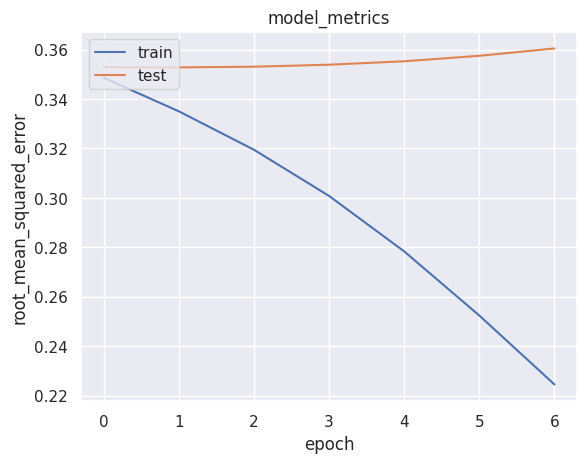

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Grafik di atas menunjukkan perubahan nilai *Root Mean Squared Error* (RMSE) selama proses pelatihan model rekomendasi. Terlihat bahwa RMSE pada data pelatihan (train) mengalami penurunan yang konsisten dan signifikan dari sekitar 0.35 hingga mencapai sekitar 0.22 seiring bertambahnya jumlah epoch. Penurunan ini menunjukkan bahwa model mampu mempelajari pola dari data pelatihan dengan baik.

Namun, berbeda dengan data pelatihan, RMSE pada data pengujian (test) justru terlihat relatif konstan di kisaran 0.35–0.36, bahkan menunjukkan sedikit peningkatan pada akhir proses pelatihan. Pola ini merupakan indikasi dari gejala *overfitting*, di mana model terlalu menyesuaikan diri dengan data pelatihan dan kehilangan kemampuan generalisasi terhadap data baru. Dengan kata lain, meskipun model tampak berkinerja sangat baik pada data yang dikenalnya, performanya tidak meningkat, bahkan cenderung menurun, saat dihadapkan dengan data yang belum pernah dilihat sebelumnya. Hal ini menandakan perlunya penerapan teknik regularisasi atau strategi lain untuk meningkatkan kemampuan generalisasi model.
